In [23]:
import os
import pandas as pd
%matplotlib inline

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [25]:
# Read your api key environment variable
api_key=os.getenv("NEWSAPI_KEY")
print(api_key)


c327e74b54e44abdb506c784c7cd33d7


In [26]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [27]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
            q="bitcoin",
            language="en",
            sort_by="relevancy")

In [28]:
type(btc_headlines)

dict

In [69]:
import pprint
pprint.pprint(btc_headlines)

{'articles': [{'author': 'Jack Morse',
               'content': "J.K. Rowling has been drinking a lot and you'd "
                          'better believe she has some thoughts on Bitcoin.\r\n'
                          'NotedTERF and author of The Cuckoos Calling, '
                          'Rowlingdecided Friday was the perfect time to learn '
                          'about… [+2124 chars]',
               'description': "J.K. Rowling has been drinking a lot and you'd "
                              'better believe she has some thoughts on '
                              'Bitcoin.\n'
                              'Noted TERF and author of The Cuckoo’s Calling, '
                              'Rowling decided Friday was the perfect time to '
                              'learn about the cryptocurrency Bitcoin. And so, '
                              'like any celebrity wh…',
               'publishedAt': '2020-05-16T00:34:00Z',
               'source': {'id': 'mashable', 'name': 

In [30]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
            q="ethereum",
            language="en",
            sort_by="relevancy")

In [70]:
pprint.pprint(eth_headlines)

{'articles': [{'author': 'Henry Pickavet',
               'content': 'Editors note:Andreessen Horowitzs Crypto Startup '
                          'School brought together 45 participants from around '
                          'the U.S. and overseas in a seven-week course to '
                          'learn how to build crypto companies. Andreessen Ho… '
                          '[+2503 chars]',
               'description': 'In week two of a16z’s Crypto Startup School, '
                              'three company-builders provide real-world '
                              'advice on using the qualities of crypto to '
                              'create new business models and networks.',
               'publishedAt': '2020-05-20T19:00:17Z',
               'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
               'title': 'Crypto Startup School: How to scale companies using '
                        'crypto',
               'url': 'http://techcrunch.com/2020/05/20/cr

In [32]:
# create function for creating a list sentiments from text using polarity scores
def create_df(news, language):
    sentiments = []
    for articles in news['articles']:
        try:
            text = articles['content']
            results = analyzer.polarity_scores(text)
            compound = results['compound']
            pos = results['pos'] 
            neu= results['neu']
            neg = results['neg']
            
            sentiments.append({
                'text': text,
                'Compound' : compound,
                'Positive' : pos,
                'Neutral' : neu,
                'Negative' : neg              
            
            })
        except AttributeError:
            pass
    return pd.DataFrame(sentiments)

In [36]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment_df = create_df(btc_headlines, 'en')

In [37]:
bitcoin_sentiment_df.head(5)

,text,Compound,Positive,Neutral,Negative
0,J.K. Rowling has been drinking a lot and you'd...,0.7650,0.171,0.829,0.000
1,"Yesterday, the prominent bitcoin investor Mich...",0.3182,0.067,0.933,0.000
2,"Early next week, Bitcoin is about to experienc...",0.2716,0.061,0.939,0.000
3,Over the last few weeks all eyes in the crypto...,0.0000,0.000,1.000,0.000
4,If youre planning to do some protesting and yo...,-0.3464,0.046,0.819,0.134


In [38]:
eth_sentiment_df = create_df(eth_headlines, 'en')

In [39]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment_df.head(10)

,text,Compound,Positive,Neutral,Negative
0,Editors note:Andreessen Horowitzs Crypto Start...,0.0000,0.000,1.000,0.000
1,For developers looking to quickly build identi...,0.0000,0.000,1.000,0.000
2,Use this to send Ether from one account to ano...,0.6249,0.141,0.859,0.000
3,"Some open-source groups, such as The Linux Fou...",-0.4457,0.031,0.882,0.086
4,With unemployment surging and businesses strug...,0.0000,0.148,0.703,0.148
5,Over the last few weeks all eyes in the crypto...,0.0000,0.000,1.000,0.000
6,We have been looking for ways in which crypto ...,0.5719,0.115,0.885,0.000
7,"Back in March, we put out our call for ideas t...",0.2732,0.057,0.943,0.000
8,<ul><li>The cryptocurrency market added $13 bi...,0.0772,0.066,0.877,0.058
9,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.910,0.000


In [40]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,Compound,Positive,Neutral,Negative
count,19.000000,19.000000,19.000000,19.000000
mean,0.253084,0.071632,0.903368,0.024947
std,0.398747,0.051823,0.050314,0.046209
min,-0.585900,0.000000,0.812000,0.000000
25%,0.000000,0.044000,0.878000,0.000000
50%,0.507000,0.090000,0.910000,0.000000
75%,0.507000,0.090000,0.920000,0.029000
max,0.801600,0.188000,1.000000,0.134000


In [41]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Positive,Neutral,Negative
count,16.000000,16.000000,16.000000,16.000000
mean,0.208544,0.083125,0.891562,0.025188
std,0.379712,0.095304,0.109049,0.044487
min,-0.445700,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.872500,0.000000
50%,0.038600,0.061500,0.897500,0.000000
75%,0.523225,0.121500,1.000000,0.039250
max,0.919800,0.335000,1.000000,0.148000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score of 0.083.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score of 0.9198

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score at 0.3350

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [42]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [44]:
# Expand the default stopwords list if necessary
print(stopwords.words("english"))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
sw = stopwords.words('english')

In [48]:
pprint.pprint(btc_headlines)

{'articles': [{'author': 'Jack Morse',
               'content': "J.K. Rowling has been drinking a lot and you'd "
                          'better believe she has some thoughts on Bitcoin.\r\n'
                          'NotedTERF and author of The Cuckoos Calling, '
                          'Rowlingdecided Friday was the perfect time to learn '
                          'about… [+2124 chars]',
               'description': "J.K. Rowling has been drinking a lot and you'd "
                              'better believe she has some thoughts on '
                              'Bitcoin.\n'
                              'Noted TERF and author of The Cuckoo’s Calling, '
                              'Rowling decided Friday was the perfect time to '
                              'learn about the cryptocurrency Bitcoin. And so, '
                              'like any celebrity wh…',
               'publishedAt': '2020-05-16T00:34:00Z',
               'source': {'id': 'mashable', 'name': 

In [59]:
words = btc_headlines['articles'][0]['content']
words

"J.K. Rowling has been drinking a lot and you'd better believe she has some thoughts on Bitcoin.\r\nNotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars]"

In [60]:
first_result = [word.lower() for word in words if word.lower() not in sw]

In [75]:

wnl = WordNetLemmatizer()
sw = stopwords.words('english')
sw.append('.')
sw.append('\n')
sw.append(',')
sw.append('')
sw = set(sw)


In [76]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
        
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
        
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in sw, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
        
    return tokens

In [78]:
# Create a new tokens column for bitcoin
bitcoin_sentiment_df['tokens'] = bitcoin_sentiment_df.text.apply(tokenizer)
bitcoin_sentiment_df.head()


,text,Compound,Positive,Neutral,Negative,tokens
0,J.K. Rowling has been drinking a lot and you'd...,0.7650,0.171,0.829,0.000,"[J.K., Rowling, drinking, lot, 'd, better, bel..."
1,"Yesterday, the prominent bitcoin investor Mich...",0.3182,0.067,0.933,0.000,"[Yesterday, prominent, bitcoin, investor, Mich..."
2,"Early next week, Bitcoin is about to experienc...",0.2716,0.061,0.939,0.000,"[Early, next, week, Bitcoin, experience, third..."
3,Over the last few weeks all eyes in the crypto...,0.0000,0.000,1.000,0.000,"[last, week, eye, crypto, world, glued, halven..."
4,If youre planning to do some protesting and yo...,-0.3464,0.046,0.819,0.134,"[youre, planning, protesting, dont, want, risk..."


In [79]:
# Create a new tokens column for ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df.text.apply(tokenizer)
eth_sentiment_df.head()

,text,Compound,Positive,Neutral,Negative,tokens
0,Editors note:Andreessen Horowitzs Crypto Start...,0.0000,0.000,1.000,0.000,"[Editors, note, Andreessen, Horowitzs, Crypto,..."
1,For developers looking to quickly build identi...,0.0000,0.000,1.000,0.000,"[developer, looking, quickly, build, identity,..."
2,Use this to send Ether from one account to ano...,0.6249,0.141,0.859,0.000,"[Use, send, Ether, one, account, another, smar..."
3,"Some open-source groups, such as The Linux Fou...",-0.4457,0.031,0.882,0.086,"[open-source, group, Linux, Foundation, deal, ..."
4,With unemployment surging and businesses strug...,0.0000,0.148,0.703,0.148,"[unemployment, surging, business, struggling, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [80]:
from collections import Counter
from nltk import ngrams

In [84]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    bigrams = ngrams(tokenizer(corpus.text.str.cat()), n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [85]:
btc_bigrams = bigram_counter(bitcoin_sentiment_df)
btc_bigrams

,bigram,count
0,"(Satoshi, Nakaboto)",16
1,"(char, robot)",8
2,"(robot, colleague)",8
3,"(colleague, Satoshi)",8
4,"(Nakaboto, writes)",8
5,"(writes, Bitcoin)",8
6,"(every, fucking)",8
7,"(fucking, day)",8
8,"(day, Welcome)",8
9,"(Welcome, another)",8


In [86]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = bigram_counter(eth_sentiment_df)
eth_bigrams

,bigram,count
0,"(Open, Source)",2
1,"(Satoshi, Nakaboto)",2
2,"(char, Opinions)",2
3,"(Opinions, expressed)",2
4,"(expressed, Entrepreneur)",2
5,"(Entrepreneur, contributor)",2
6,"(Editors, note)",1
7,"(note, Andreessen)",1
8,"(Andreessen, Horowitzs)",1
9,"(Horowitzs, Crypto)",1


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

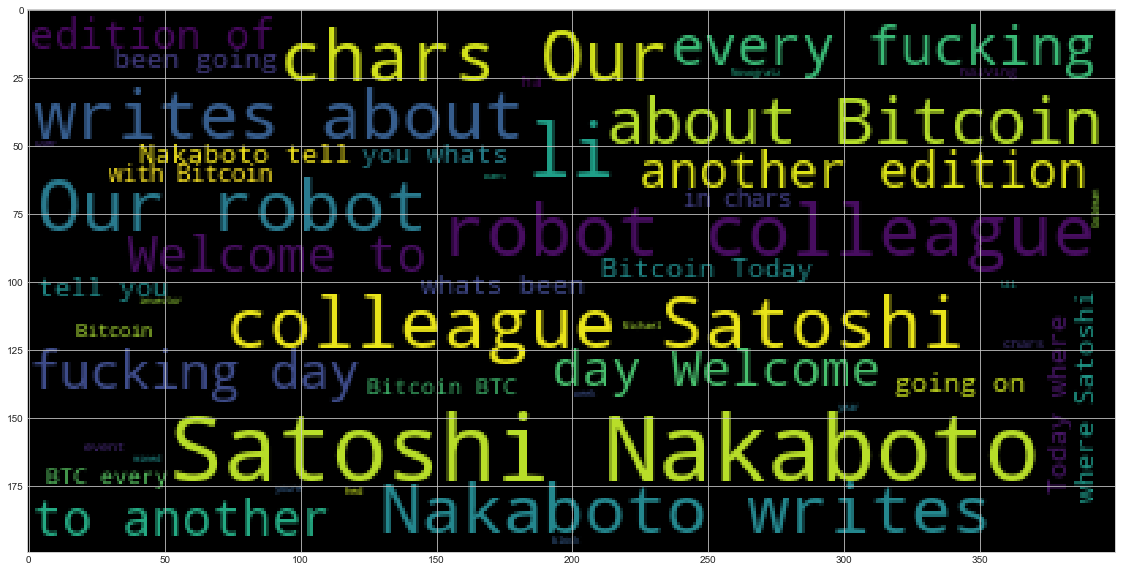

In [90]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(bitcoin_sentiment_df.text.str.cat())
plt.imshow(btc_wc)


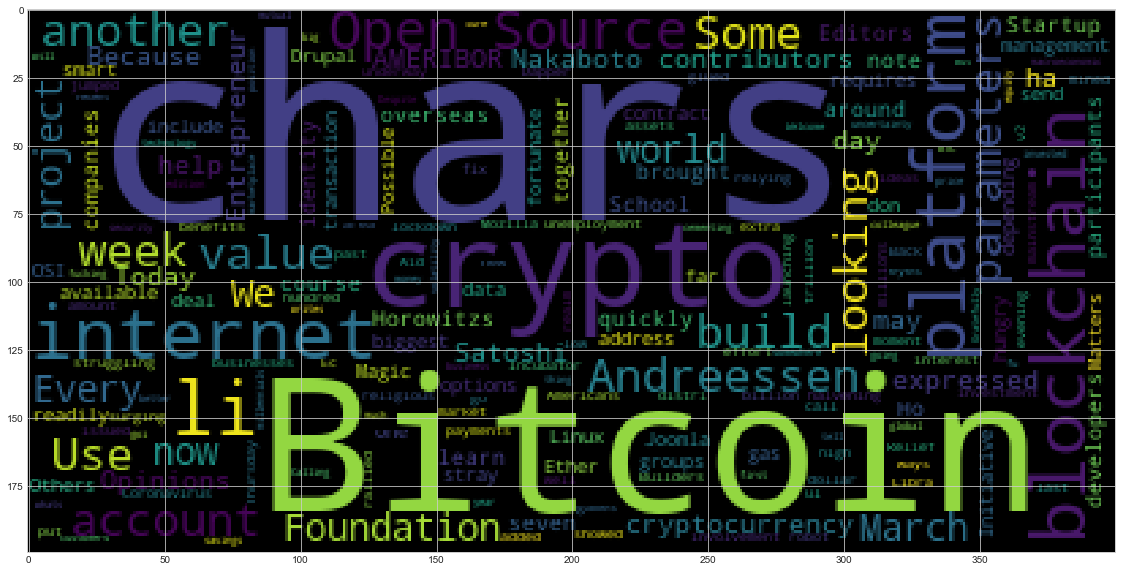

In [92]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_sentiment_df.text.str.cat())
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [95]:
import spacy
from spacy import displacy

In [96]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [97]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [98]:
# Concatenate all of the bitcoin text together
all_btc_text = bitcoin_sentiment_df.text.str.cat()
all_btc_text

'J.K. Rowling has been drinking a lot and you\'d better believe she has some thoughts on Bitcoin.\r\nNotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars]Yesterday, the prominent bitcoin investor Michael Terpin announced that hed filed suit against the ringleader of a SIM swap gang that hed been chasing down since 2018, following the theft of roughly … [+2243 chars]Early next week, Bitcoin is about to experience its third-ever halving, a hugely important event that could shift the balance of power within the network. Historically the event, also called the halv… [+7424 chars]Over the last few weeks all eyes in the crypto world have been glued to the halvening, a nigh-religious moment in the blockchain realm. Every once in a while, the amount of new bitcoin mined — distri… [+4849 chars]If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yoursel

In [31]:
# Run the NER processor on all of the text

# Add a title to the document

In [100]:
# Render the visualization
doc = nlp(all_btc_text)

displacy.render(doc, style='ent', jupyter=True)

In [102]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label)

J.K. Rowling 380
Bitcoin 384
The Cuckoos Calling 388
Friday 391
Michael Terpin 380
SIM 383
2018 391
next week 391
Bitcoin 384
third 396
the last few weeks 391
blockchain 384
new bitcoin 385
first 396
Bitcoin 384
2009 391
three 397
210,000 397
every four years 391
Bitcoin 384
$13 billion 394
the past day 391
bitcoin 384
more than 6% 393
Thursday 391
Bitcoin 384
more than 100% 393
March 16 391
Goldman Sachs 383
five 397
bitcoin 384
Wednesday 391
Goldman 383
Michael Novogratz 380
Monday 391
bitcoin 384
$10,000 resistance 394
Novogratz 380
Satoshi Nakaboto 380
Bitcoin 384
Bitcoin 384
Today 391
Satoshi Nakaboto 380
Bitcoin 384
bitcoin 384
2012 391
Satoshi Nakaboto 380
Bitcoin 384
Bitcoin 384
Today 391
Satoshi Nakaboto 380
Bitcoin 384
+3041 384
2020 391
a big year 391
Bitcoin 384
Satoshi Nakaboto 380
Bitcoin 384
Bitcoin 384
Today 391
Satoshi Nakaboto 380
Bitcoin 384
Satoshi Nakaboto 380
Bitcoin 384
Bitcoin 384
Today 391
Satoshi Nakaboto 380
Bitcoin 384
Satoshi Nakaboto 380
Bitcoin 384
Bitcoi

---

## Ethereum NER

In [101]:
# Concatenate all of the bitcoin text together
all_eth_text = eth_sentiment_df.text.str.cat()
all_eth_text

'Editors note:Andreessen Horowitzs Crypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+2503 chars]For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.\r\nMagic, a… [+2450 chars]Use this to send Ether from one account to another or a smart contract address. It requires a few parameters depending on the transaction. Possible parameters include from, to, value, gas, and more.\r… [+206 chars]Some open-source groups, such as The Linux Foundation, can deal with it. Others aren\'t so fortunate. Some, such as Drupal Foundation, the Open Source Initiative (OSI), Open Source Matters (Joomla), a… [+1202 chars]With unemployment surging and businesses struggling under lockdown, millions of Americans are relying on the extra benefits payments issued 

In [103]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)



In [104]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [105]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Andreessen ORG
Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Ether PERSON
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
millions CARDINAL
Americans NORP
$2 trillion dollar MONEY
Relief ORG
Ec ORG
the last few weeks DATE
blockchain GPE
new bitcoin LOC
crypto NORP
Dapper ORG
Libra GPE
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
$13 billion MONEY
the past day DATE
bitcoin GPE
more than 6% PERCENT
Thursday DATE
Bitcoin GPE
more than 100% PERCENT
March 16 DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
first ORDINAL
blockchain GPE
2020 DATE
a big year DATE
Bitcoin GPE
Facebook PERSON
Telegram PERSON
today DATE
27 CARDINAL
Java PERSON
Jerome H. Powell PERSON
May 28, 2020 DATE
